# **Linear Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/linear_data.csv", sep = ",")

In [ ]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [ ]:
df.tail()

,x,y
495,9.91984,25.356174
496,9.93988,24.417804
497,9.95992,25.625916
498,9.97996,24.269704
499,10.00000,24.732043


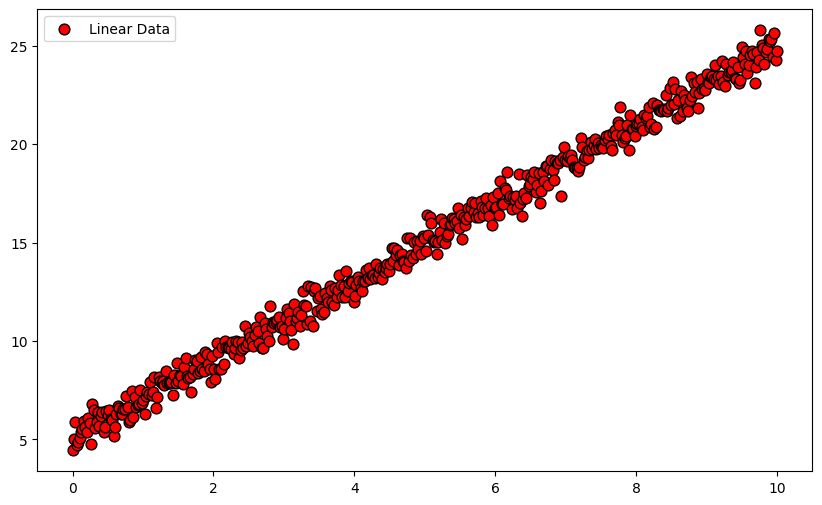

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df['x'],df['y'],
            s=60,
            c='red',
            edgecolors='k',
            label = "Linear Data")
plt.legend()

In [ ]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


# **Non Linear Data**

In [ ]:
df2 =pd.read_csv("/content/nonlinear_data.csv", sep=',')

In [ ]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [ ]:
df2.tail()

,x,y
495,9.91984,-0.959196
496,9.93988,-0.912081
497,9.95992,-1.026475
498,9.97996,-1.019379
499,10.00000,-1.021716


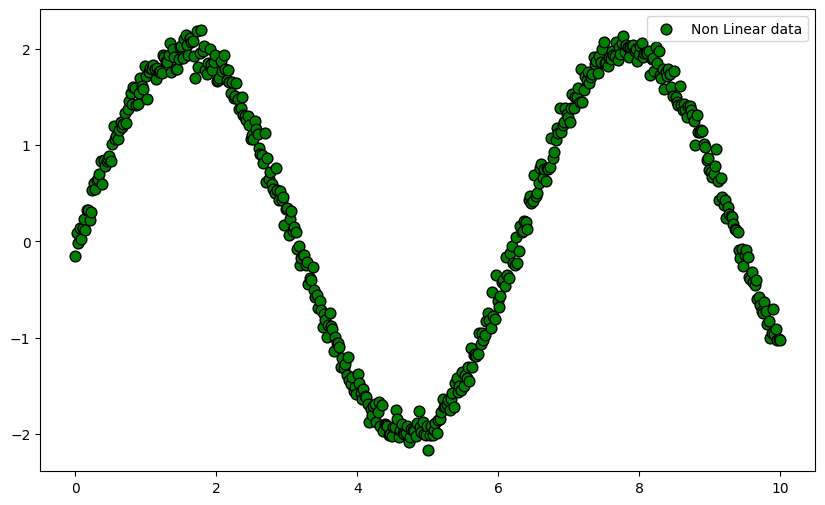

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df2['x'],df2['y'],
            s=60,
            c='green',
            edgecolors='k',
            label="Non Linear data")
plt.legend()

In [ ]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


`plt.figure()`: This function initializes a new figure.

`plt.subplot()`: This function adds a subplot to the figure. The subplot function takes three arguments: the number of rows, the number of columns, and the index of the current subplot and subplot(1, 2, 1): This specifies that the figure should be divided into 1 row and 2 columns of subplots, and the 1 at the end indicates that this is the first subplot.

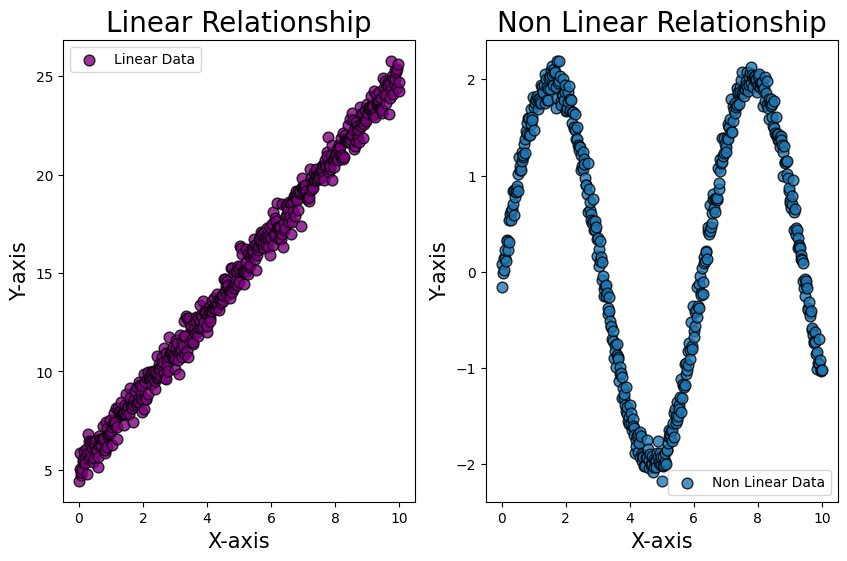

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

plt.scatter(df["x"],df["y"],
            c="purple",
            s=60,
            alpha=0.8,
            edgecolors='k',
            label='Linear Data')
plt.xlabel("X-axis",loc='center',fontsize=15)
plt.ylabel("Y-axis",loc='center',fontsize=15)
plt.title("Linear Relationship",loc='center', fontsize=20)
plt.legend()

plt.subplot(1,2,2)

plt.scatter(df2["x"],df2["y"],
            s=60,
            alpha=0.8,
            edgecolors='k',
            label='Non Linear Data')
plt.xlabel("X-axis",loc='center',fontsize=15)
plt.ylabel("Y-axis",loc='center',fontsize=15)
plt.title("Non Linear Relationship",loc='center', fontsize=20)
plt.legend()

In [ ]:
correlation_linear = np.corrcoef(df['x'], df['y'])
print("Correlation coefficient for linear relationship:\n", correlation_linear)

Correlation coefficient for linear relationship:
 [[1.         0.99643985]
 [0.99643985 1.        ]]


In [ ]:
correlation_non_linear = np.corrcoef(df2['x'], df2['y'])
print("Correlation coefficient for Non linear relationship:\n", correlation_non_linear)

Correlation coefficient for Non linear relationship:
 [[ 1.         -0.06573583]
 [-0.06573583  1.        ]]


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(df[['x']],df['y'])

LinearRegression()

In [ ]:
x = df[['x']]
y = df['y']

In [ ]:
reg.score(x,y)*100

99.28923730526016

In [ ]:
df3 =df.copy()

In [ ]:
df3['Predicted y'] = reg.predict(df[['x']])

In [ ]:
df3.head()

,x,y,Predicted y
0,0.00000,4.447692,5.051862
1,0.02004,5.024612,5.091817
2,0.04008,5.869593,5.131773
3,0.06012,4.722490,5.171728
4,0.08016,4.877101,5.211683


In [ ]:
reg1 = LinearRegression()

In [ ]:
reg1.fit(df[['x']],df2[['y']])

LinearRegression()

In [ ]:
df4 = df2.copy()

In [ ]:
df4['predicted'] = reg1.predict(df2[['x']])

In [ ]:
df4.head()

,x,y,predicted
0,0.00000,-0.155043,0.51565
1,0.02004,0.081809,0.51504
2,0.04008,-0.014298,0.51443
3,0.06012,0.143978,0.51382
4,0.08016,0.019553,0.51321


In [ ]:
reg1.score(df2[['x']],df2[['y']]) * 100

0.4321199719043656

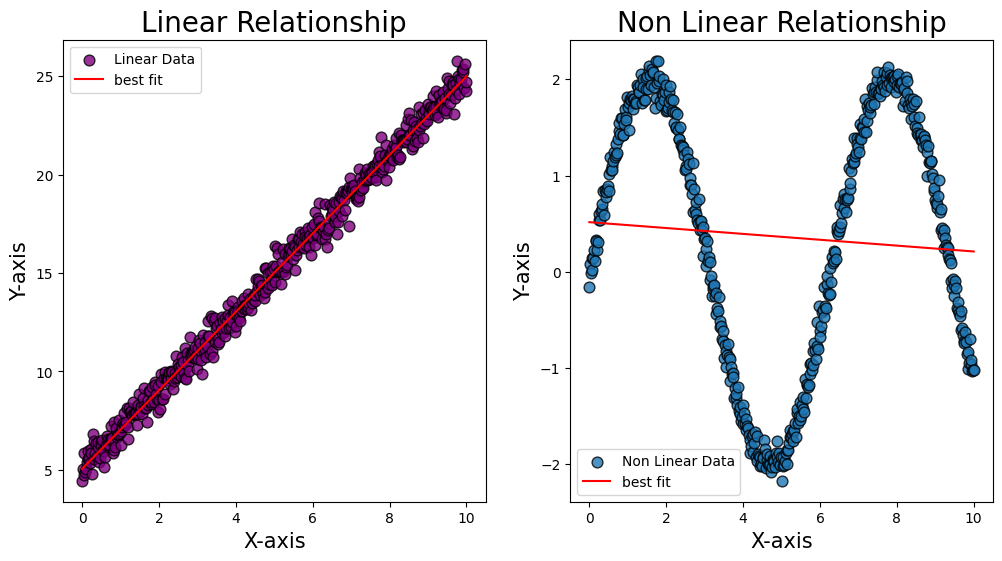

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(df["x"],df["y"],
            c="purple",
            s=60,
            alpha=0.8,
            edgecolors='k',
            label='Linear Data')
plt.xlabel("X-axis",loc='center',fontsize=15)
plt.ylabel("Y-axis",loc='center',fontsize=15)
plt.title("Linear Relationship",loc='center', fontsize=20)
plt.plot(df3['x'],df3['Predicted y'], color='red', label='best fit')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(df2["x"],df2["y"],
            s=60,
            alpha=0.8,
            edgecolors='k',
            label='Non Linear Data')
plt.xlabel("X-axis",loc='center',fontsize=15)
plt.ylabel("Y-axis",loc='center',fontsize=15)
plt.title("Non Linear Relationship",loc='center', fontsize=20)
plt.plot(df4['x'],df4['predicted'], color='red', label='best fit')

plt.legend()

# **Polynomial Regression = Poly Feature + Linear Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=6)

In [ ]:
x_poly = poly.fit_transform(df2[['x']])

In [ ]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07


In [ ]:
df2.x.head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [ ]:
poly_reg = LinearRegression()

In [ ]:
poly_reg.fit(x_poly,df2[['y']])

LinearRegression()

In [ ]:
poly_reg.score(x_poly,df2[['y']]) * 100

99.3062484449735

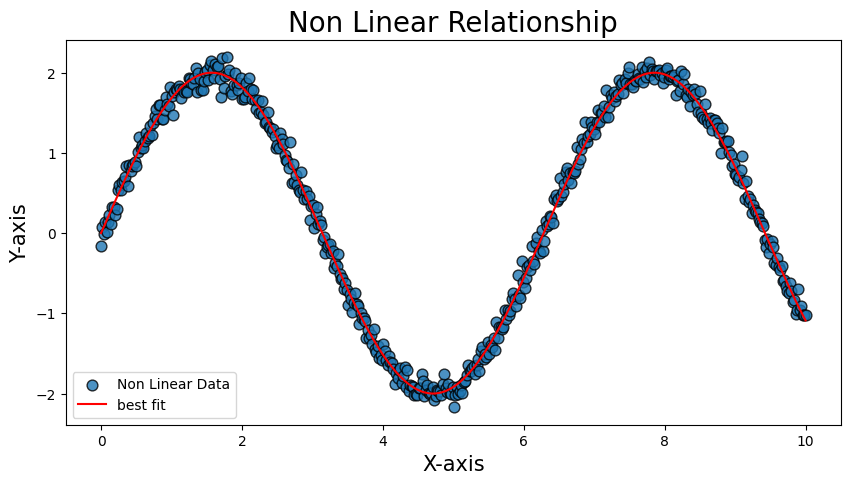

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(df2["x"],df2["y"],
            s=60,
            alpha=0.8,
            edgecolors='k',
            label='Non Linear Data')
plt.xlabel("X-axis",loc='center',fontsize=15)
plt.ylabel("Y-axis",loc='center',fontsize=15)
plt.title("Non Linear Relationship",loc='center', fontsize=20)
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='best fit')

plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = pd.DataFrame(x_poly)
y = df2.y

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.75,random_state=42)

In [ ]:
xtrain.head()

,0,1,2,3,4,5,6
227,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683,8862.410644
417,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563,340575.228054
203,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707,4532.866762
126,1.0,2.525050,6.375878,16.099411,40.651820,102.647883,259.191048
329,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705,82143.293924


In [ ]:
ytrain.head()

,y
227,-1.750801
417,1.584670
203,-1.638219
126,1.063157
329,0.757251


In [ ]:
poly_reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Test Score
poly_reg.score(xtest,ytest) * 100

99.24289090468366

In [ ]:
# Train Score
poly_reg.score(xtrain,ytrain) * 100

99.31809889865094